In [1]:
## Read table, combine table, parse the time string, save to pkl
## Visualize the excursion event
import pandas as pd
import matplotlib.pylab as plt
from datetime import datetime
import matplotlib.dates as mdates
import numpy as np
from scipy import signal
from scipy.fftpack import fft, ifft
import time
from src.anomaly_detection import *
from src.utils import *
pd.set_option('display.max_columns', 51)
font = {'family' : 'Consolas',
        'weight' : 'bold',
        'size'   : 32}
plt.rc('font', **font)
import os 
dir_path = os.getcwd()
data_dir = os.path.abspath(os.path.join(dir_path, '../data'))
print (data_dir)
combined_pkl = os.path.join(data_dir, "combine.pkl")
combined_pkg_tbl = os.path.join(data_dir, 'combine_table.pkl')
part1_pkl = os.path.join(data_dir, "Part1.pkl")
part2_pkl = os.path.join(data_dir, "Part2.pkl")
%matplotlib inline

Using TensorFlow backend.


/media/computer/1TB_disk/10_ML_proj/16_BHP_DigitalTribe/Challenge2FinalData/unu_bhp_2018/data


In [2]:
file_df = pd.read_pickle("data/combined.pkl")
#file_df.info()

In [ ]:
anomaly_detection = anomaly_detection(sequence_length=100, batch_size=128, epochs=60, dropout=0.6, verbose = 2)
start = time.time()
start_time = datetime(2016, 11, 15,10,0)
end_time = datetime(2016, 11, 16, 10,0)
time_range= (file_df["Time"] < end_time) & (file_df["Time"] > start_time)
column_name = "21-LT-10516.PV_Prod_Sep_Oil_Interface_Level (%)"
time_series = file_df[time_range][column_name]
anomaly_detection.set_name(column_name)
anomaly_detection.timeseries_fit(time_series, show_figures=True, run_model = True)

/home/computer/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/computer/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Train on 2573 samples, validate on 1286 samples
Epoch 1/15
Epoch 00001: val_loss improved from inf to 0.00449, saving model to /media/computer/1TB_disk/10_ML_proj/16_BHP_DigitalTribe/Challenge2FinalData/unu_bhp_2018/data/05-PT-33101-03_G1_Manifold_Pressure (Psi)_weights.hdf5
 - 7s - loss: 0.0156 - val_loss: 0.0045
Epoch 2/15
Epoch 00002: val_loss did not improve
 - 5s - loss: 0.0064 - val_loss: 0.0061
Epoch 3/15
Epoch 00003: val_loss improved from 0.00449 to 0.00439, saving model to /media/computer/1TB_disk/10_ML_proj/16_BHP_DigitalTribe/Challenge2FinalData/unu_bhp_2018/data/05-PT-33101-03_G1_Manifold_Pressure (Psi)_weights.hdf5
 - 5s - loss: 0.0055 - val_loss: 0.0044
Epoch 4/15
Epoch 00004: val_loss did not improve
 - 5s - loss: 0.0037 - val_loss: 0.0067
Epoch 5/15
Epoch 00005: val_loss improved from 0.00439 to 0.00321, saving model to /media/computer/1TB_disk/10_ML_proj/16_BHP_DigitalTribe/Challenge2FinalData/unu_bhp_2018/data/05-PT-33101-03_G1_Manifold_Pressure (Psi)_weights.hdf5
 -

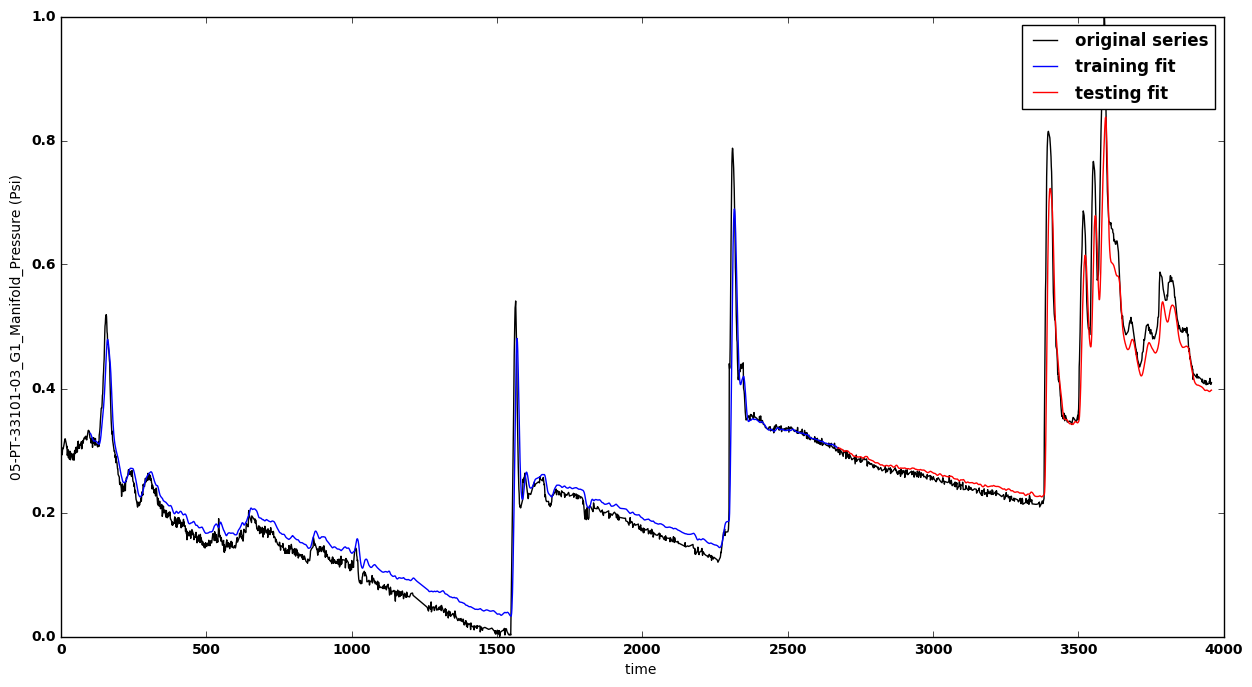

In [29]:
anomaly_detection2 = anomaly_detection(sequence_length=100, batch_size=256, epochs=15, dropout=0.6, verbose = 2)
start = time.time()
start_time = datetime(2017, 3, 11,10,0)
end_time = datetime(2017, 3, 12, 20,0)
time_range= (file_df["Time"] < end_time) & (file_df["Time"] > start_time)
column_name = "05-PT-33101-03_G1_Manifold_Pressure (Psi)"
time_series = file_df[time_range][column_name]
anomaly_detection2.set_name(column_name)
anomaly_detection2.timeseries_fit(time_series, show_figures=True, run_model = True)

In [3]:
anomalies = anomaly_detection2.find_anomaly(error_level=0.15)
if anomalies.any():
    print("Found {len(anomalies)} anomalies in {column_name} between {start_time} and {end_time}")
    fig, ax = plt.subplots(figsize=(30,15))
    x = np.asarray(file_df[time_range]['Time'])
    y = np.asarray(time_series)
    ax.plot(x, y, color='b')
    for i in anomalies:
        ax.plot(x[i],y[i],'ro')
        ax.xaxis.set_major_formatter(datefmt)
    plt.xlabel('Time Stamp')
    plt.ylabel(column_name)

NameError: name 'anomaly_detection2' is not defined

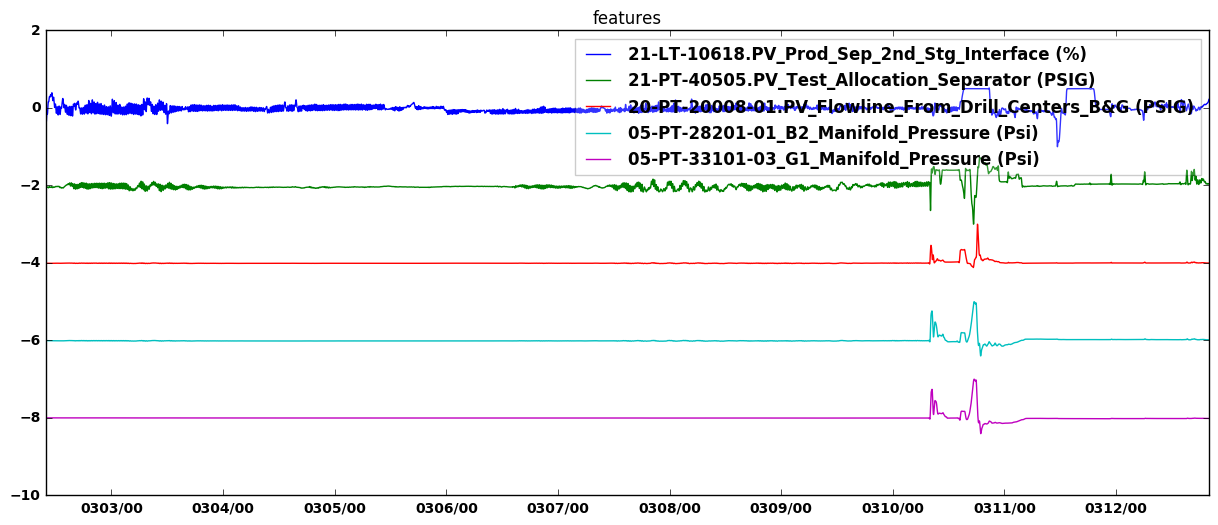

In [22]:
start_time = datetime(2017, 3, 2,10,0)
end_time = datetime(2017, 3, 12, 20,0)

features = [ "21-LT-10618.PV_Prod_Sep_2nd_Stg_Interface (%)",
            "21-PT-40505.PV_Test_Allocation_Separator (PSIG)",
            "20-PT-20008-01.PV_Flowline_From_Drill_Centers_B&G (PSIG)",
            "05-PT-28201-01_B2_Manifold_Pressure (Psi)",
            "05-PT-33101-03_G1_Manifold_Pressure (Psi)"
            ]

plot_features(file_df, start_time, end_time, features, lp_filter=True, normalized=True)
plt.title("features")
plt.show()

/home/computer/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/computer/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Train on 313053 samples, validate on 156526 samples
Epoch 1/15
Epoch 00001: val_loss improved from inf to 0.00002, saving model to /media/computer/1TB_disk/10_ML_proj/16_BHP_DigitalTribe/Challenge2FinalData/unu_bhp_2018/data/05-PT-33101-03_G1_Manifold_Pressure (Psi)_weights.hdf5
 - 567s - loss: 0.0025 - val_loss: 1.5634e-05
Epoch 2/15
Epoch 00002: val_loss did not improve
 - 566s - loss: 5.4756e-04 - val_loss: 7.1501e-05
Epoch 3/15
Epoch 00003: val_loss did not improve
 - 568s - loss: 2.8230e-04 - val_loss: 1.9218e-05
Epoch 4/15
Epoch 00004: val_loss improved from 0.00002 to 0.00001, saving model to /media/computer/1TB_disk/10_ML_proj/16_BHP_DigitalTribe/Challenge2FinalData/unu_bhp_2018/data/05-PT-33101-03_G1_Manifold_Pressure (Psi)_weights.hdf5
 - 560s - loss: 1.9042e-04 - val_loss: 1.0576e-05
Epoch 5/15
Epoch 00005: val_loss did not improve
 - 571s - loss: 8.7070e-04 - val_loss: 3.2384e-04
Epoch 6/15
Epoch 00006: val_loss did not improve
 - 572s - loss: 3.3329e-04 - val_loss: 6.8757e

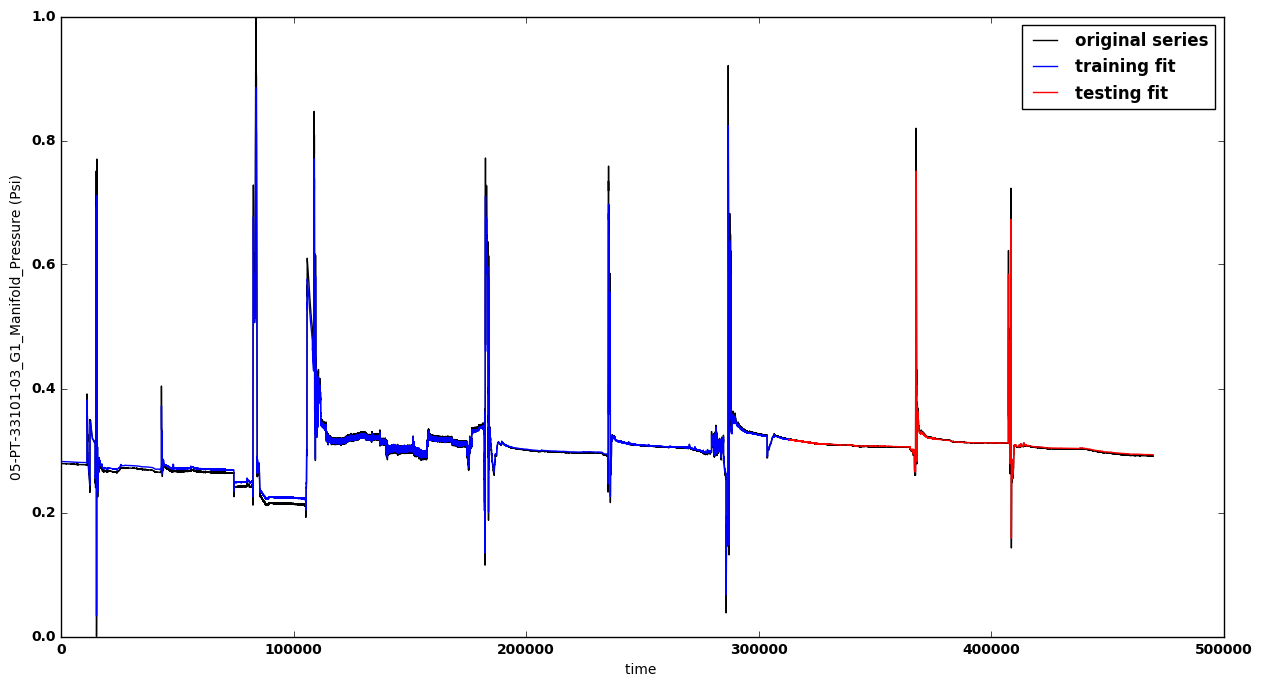

In [33]:
anomaly_detection3 = anomaly_detection(sequence_length=100, batch_size=256, epochs=15, dropout=0.6, verbose = 2)
start = time.time()
start_time = datetime(2016, 10, 20,0,0)
end_time = datetime(2017, 4, 1, 0,0)
time_range= (file_df["Time"] < end_time) & (file_df["Time"] > start_time)
column_name = "05-PT-33101-03_G1_Manifold_Pressure (Psi)"
time_series = file_df[time_range][column_name]
anomaly_detection3.set_name(column_name)
anomaly_detection3.timeseries_fit(time_series, show_figures=True, run_model = True)

In [ ]:
anomalies = anomaly_detection3.find_anomaly(error_level=0.001)
if anomalies.any():
    print("Found {len(anomalies)} anomalies in {column_name} between {start_time} and {end_time}")
    fig, ax = plt.subplots(figsize=(30,15))
    x = np.asarray(file_df[time_range]['Time'])
    y = np.asarray(time_series)
    ax.plot(x, y, color='b')
    for i in anomalies:
        ax.plot(x[i],y[i],'ro')
        ax.xaxis.set_major_formatter(datefmt)
    plt.xlabel('Time Stamp')
    plt.ylabel(column_name)

Found {len(anomalies)} anomalies in {column_name} between {start_time} and {end_time}


KeyboardInterrupt: 

In [ ]:
upset_events = [20161026, 20161111, 20161116, 20161127, 20170128, 20170312]
def parse_npdate(array):
    '''
    Input: array of datetime
    Output: array year
            array month
            array day
            array hour
            array min
    '''
    n = len(array)
    year = np.arange(n)
    month = np.arange(n)
    day = np.arange(n)
    hour = np.arange(n)
    mini = np.arange(n)
    for i in range(n):
        (tem1, tem2) = str(array[i]).split("T")
        tem1_s = tem1.split("-")
        tem2_s = tem2.split(":")
        year[i] = tem1_s[0]
        month[i] = tem1_s[1]
        day[i] = tem1_s[2]
        hour[i] = tem2_s[0]
        mini[i] = tem2_s[1]
    return year, month, day, hour, mini

def check_subset(List1, List2):
    '''
    If List1 contains List 2
    '''
    set1 = set(List1)
    set2 = set(List2)
    return set1 >= set2

anomalies = anomaly_detection3.find_anomaly(error_level=0.001)
x = file_df[time_range]['Time'].values
index = anomalies
x_ab = x[index]
year, month, day, hour, mini = parse_npdate(x_ab)
test = np.unique(year * 10000 + month * 100 + day)
print(len(set(test)))
print("If this include all upsets ", check_subset(test, upset_events))
print("What left out", set(upset_events) - set(test))